In [ ]:
!pip install ipycytoscape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00


Using Colab cache for faster access to the 'toy-network-datasets' dataset.
Path to dataset files: /kaggle/input/toy-network-datasets
Fichiers .net disponibles : ['NetScience.net', '26KeroNetwork.net', 'YeastS.net', 'Ring25.net', 'imports_manufactures.net']

=== Graphe : NetScience.net ===
Nombre de nœuds : 1589
Nombre d’arêtes : 2742


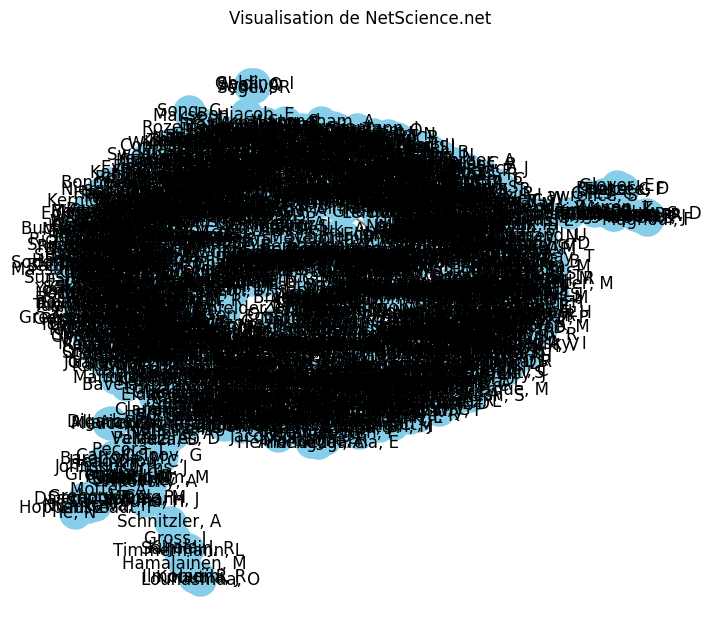

Degrés des premiers nœuds : [('Kuperman, M', 3), ('Acebron, J', 4), ('Bonilla, L', 4), ('Perezvicente, C', 4), ('Ritort, F', 4), ('Spigler, R', 4), ('Adamic, L', 4), ('Adar, E', 1), ('Huberman, B', 6), ('Lukose, R', 3)]


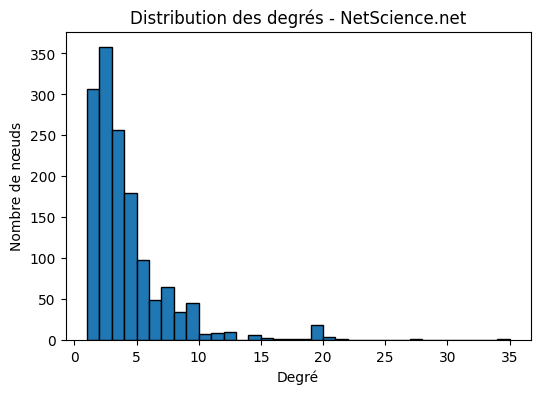

In [ ]:
# --- Imports ---
import kagglehub
import os
import networkx as nx
import matplotlib.pyplot as plt
from ipycytoscape import CytoscapeWidget

# --- 1. Télécharger le dataset depuis KaggleHub ---
path = kagglehub.dataset_download("mateuscco/toy-network-datasets")
print("Path to dataset files:", path)

# --- 2. Lister les fichiers disponibles ---
files = [f for f in os.listdir(path) if f.endswith(".net")]
print("Fichiers .net disponibles :", files)

# --- 3. Fonction utilitaire pour analyse et visualisation ---
def analyze_graph(filename):
    print("\n=== Graphe :", filename, "===")
    graph_file = os.path.join(path, filename)

    # Charger le graphe
    G = nx.read_pajek(graph_file)
    G = nx.Graph(G)  # Conversion en graphe simple

    # Infos
    print("Nombre de nœuds :", G.number_of_nodes())
    print("Nombre d’arêtes :", G.number_of_edges())

    # Visualisation matplotlib
    plt.figure(figsize=(7, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
    plt.title(f"Visualisation de {filename}")
    plt.show()

    # Degrés
    degrees = dict(G.degree())
    print("Degrés des premiers nœuds :", list(degrees.items())[:10])  # un aperçu

    # Histogramme des degrés
    plt.figure(figsize=(6, 4))
    plt.hist(list(degrees.values()), bins=range(1, max(degrees.values())+2), edgecolor="black")
    plt.xlabel("Degré")
    plt.ylabel("Nombre de nœuds")
    plt.title(f"Distribution des degrés - {filename}")
    plt.show()

    # Visualisation interactive ipycytoscape
    cyto_graph = CytoscapeWidget()
    cyto_graph.graph.add_graph_from_networkx(G)
    cyto_graph.set_style([{
        'selector': 'node',
        'style': {
            'background-color': 'skyblue',
            'label': 'data(id)',
            'width': '40px',
            'height': '40px'
        }
    }, {
        'selector': 'edge',
        'style': {
            'line-color': '#999',
            'width': 2
        }
    }])
    return cyto_graph

# --- 4. Boucler sur tous les graphes disponibles ---
widgets = {}
for f in files:
    widgets[f] = analyze_graph(f)

# --- 5. Pour afficher un graphe interactif particulier ---
# Exemple: widgets["NetScience.net"]
